In [111]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# load the data
train_df = pd.read_csv('data/sales_train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [113]:
# load supplemental data 
items_df = pd.read_csv('data/items.csv')
item_cats_df = pd.read_csv('data/item_categories.csv')
shops_df = pd.read_csv('data/shops.csv')
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [114]:
item_cats_df.head()


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [115]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [116]:
# combine the data based on the other tables to create a new train set
train_df = train_df.merge(items_df, how='left', on='item_id')
train_df = train_df.merge(item_cats_df, how='left', on='item_category_id')
train_df = train_df.merge(shops_df, how='left', on='shop_id')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [117]:
# convert the date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

In [118]:
# dropping the columns that are not needed
train_df.drop(['item_name', 'item_category_name', 'shop_name'], axis=1, inplace=True)
train_df.head()



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,37
1,2013-01-03,0,25,2552,899.00,1.0,58
2,2013-01-05,0,25,2552,899.00,-1.0,58
3,2013-01-06,0,25,2554,1709.05,1.0,58
4,2013-01-15,0,25,2555,1099.00,1.0,56


In [119]:
# checking for missing values
train_df.isnull().sum()


date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

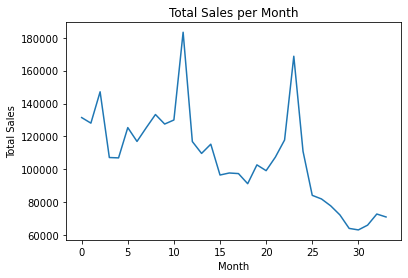

In [120]:
# plot the train data based on total item_cnt_day per month for all available years
train_df.groupby('date_block_num')['item_cnt_day'].sum().plot()
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


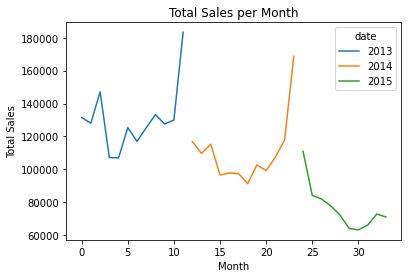

In [121]:
# plotting the data based on total sales per month and with legends for year
train_df.groupby(['date_block_num', train_df['date'].dt.year])['item_cnt_day'].sum().unstack().plot()
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


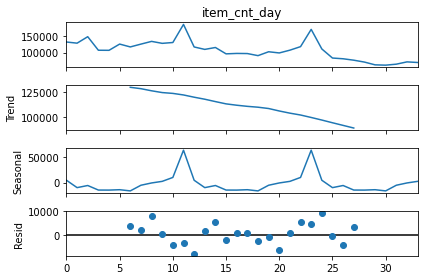

In [122]:
#time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df.groupby('date_block_num')['item_cnt_day'].sum(), model='additive', period=12)
result.plot()
plt.show()


In [123]:
# getting year ansd month from the date column
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day_of_year
train_df.head()





,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day
0,2013-01-02,0,59,22154,999.00,1.0,37,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,58,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,58,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,58,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,56,2013,1,15


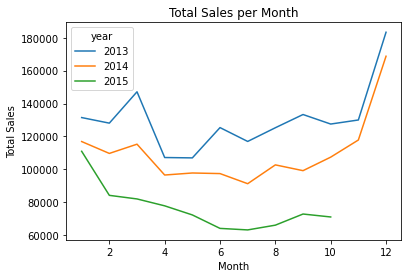

In [124]:
# plotting the total sales per month for all year with legends ans year
train_df.groupby(['month', 'year'])['item_cnt_day'].sum().unstack().plot()
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [125]:
# create a new dataframe for shop 28 and item 20949
shop_id = 28
item_id = 20949
shop_item_df = train_df[(train_df['shop_id'] == shop_id) & (train_df['item_id'] == item_id)]
shop_item_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day
359513,2013-04-29,3,28,20949,5.0,2.0,71,2013,4,119
359534,2013-04-30,3,28,20949,5.0,5.0,71,2013,4,120
449927,2013-05-31,4,28,20949,5.0,18.0,71,2013,5,151
449973,2013-05-30,4,28,20949,5.0,9.0,71,2013,5,150
449974,2013-05-28,4,28,20949,5.0,15.0,71,2013,5,148


In [126]:
# only keep shop id, item id, date_block_num and item_cnt_day columns,week and year
shop_item_df = shop_item_df[['shop_id', 'item_id', 'item_cnt_day', 'day', 'year']]
shop_item_df.head()

,shop_id,item_id,item_cnt_day,day,year
359513,28,20949,2.0,119,2013
359534,28,20949,5.0,120,2013
449927,28,20949,18.0,151,2013
449973,28,20949,9.0,150,2013
449974,28,20949,15.0,148,2013


In [127]:
# check unmber of weeks
shop_item_df['day'].nunique()

365

In [129]:
# for each year i need 52 weeks from 1 to 52 so i will create a new dataframe with 52 weeks and the item cnt for that errk is 0
shop_item_df = shop_item_df.groupby(['year', 'day'])['item_cnt_day'].sum().unstack().fillna(0).stack().reset_index()

In [130]:
shop_item_df.columns = ['year', 'day', 'item_cnt_day']

In [131]:
#chicking unique year and week
shop_item_df.shape


(1095, 3)

In [139]:
# removing last days foe year 2015 from october onwards
shop_item_df = shop_item_df[~((shop_item_df['year'] == 2015) & (shop_item_df['day'] > 300))]
shop_item_df.head()
shop_item_df.shape

(1030, 3)

In [137]:
# time series prediction model for df_ke0001 using ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit the model
model = ARIMA(train['item_cnt_day'], order=(5,1,0))
model_fit = model.fit()


c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


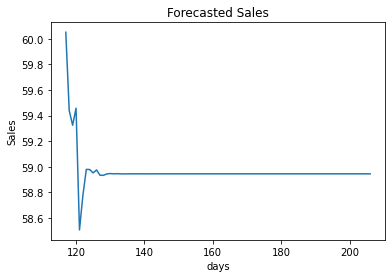

In [144]:
# forecast the model
forecast = model_fit.forecast(steps=90)
forecast

# plot the forecast with the original data 
plt.plot(forecast)
plt.title('Forecasted Sales')
plt.xlabel('days')
plt.ylabel('Sales')
plt.show()
